In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csvpath = "Resources/sfpd_incidents_2016.csv"
sfpd_df = pd.read_csv(csvpath)
sfpd_clean = sfpd_df.loc[sfpd_df['Category']!= 'NON-CRIMINAL']
sf_clean = sfpd_df[~sfpd_df['Category'].isin(['NON-CRIMINAL', 'OTHER OFFENSES','SECONDARY CODES','WARRANTS','SUICIDE','BRIBERY','EXTORTION','EXTORTION','FAMILY OFFENSES','LOITERING','SEX OFFENSES', 'NON FORCIBLE','BAD CHECKS','GAMBLING','PORNOGRAPHY/OBSCENE MAT','TREA'])]
sfpd_clean_df = sfpd_clean.dropna(how='any')
sfpd_rawdata_clean = sfpd_clean_df.drop(['PdId'], axis = 1)
sfpd_rawdata_clean

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)"
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)"
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)"
...,...,...,...,...,...,...,...,...,...,...,...,...
150494,170302853,SECONDARY CODES,DOMESTIC VIOLENCE,Thursday,09/01/2016 12:00:00 AM,00:01,BAYVIEW,NONE,1600 Block of 25TH ST,-122.395082,37.752452,"(37.7524520499536, -122.395081830837)"
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)"
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)"


In [3]:
# sub category for other offenses (Raquel)
#combine categoris to streamline (Jordan)
#quarterly breakdown of crimes (Michelle)

In [4]:
pd.to_datetime(sfpd_rawdata_clean['Date'])


0        2016-01-29
1        2016-01-29
2        2016-04-25
5        2016-01-01
6        2016-01-02
            ...    
150494   2016-09-01
150495   2016-12-30
150497   2016-12-29
150498   2016-12-30
150499   2016-12-02
Name: Date, Length: 132633, dtype: datetime64[ns]

In [5]:
sorted_dates = sfpd_rawdata_clean.sort_values(["Date"], ascending=True)
sorted_dates

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
9861,160002580,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Friday,01/01/2016 12:00:00 AM,19:05,CENTRAL,NONE,POST ST / TAYLOR ST,-122.411702,37.787872,"(37.7878718776438, -122.411702003165)"
9863,160002615,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Friday,01/01/2016 12:00:00 AM,19:40,CENTRAL,NONE,700 Block of PACIFIC AV,-122.408015,37.796700,"(37.796699717573, -122.408014703843)"
9862,160002596,TRESPASS,TRESPASSING,Friday,01/01/2016 12:00:00 AM,18:57,SOUTHERN,"ARREST, BOOKED",100 Block of HENRYADAMS ST,-122.403885,37.767938,"(37.7679376011529, -122.403884601049)"
32782,160005023,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Friday,01/01/2016 12:00:00 AM,18:00,MISSION,NONE,20TH ST / HARRISON ST,-122.412503,37.759027,"(37.7590272974496, -122.412502863675)"
22059,160006667,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Friday,01/01/2016 12:00:00 AM,18:00,RICHMOND,NONE,PINE ST / DIVISADERO ST,-122.440252,37.787112,"(37.7871116041945, -122.440251575291)"
...,...,...,...,...,...,...,...,...,...,...,...,...
111470,161061674,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Saturday,12/31/2016 12:00:00 AM,06:41,MISSION,"ARREST, BOOKED",NOE ST / 18TH ST,-122.432795,37.761020,"(37.7610201697083, -122.432795347224)"
111469,161061668,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Saturday,12/31/2016 12:00:00 AM,06:10,NORTHERN,NONE,2100 Block of BUCHANAN ST,-122.430714,37.789789,"(37.7897885529974, -122.430714047833)"
111467,161061630,OTHER OFFENSES,POSSESSION OF BURGLARY TOOLS,Saturday,12/31/2016 12:00:00 AM,05:34,SOUTHERN,"ARREST, BOOKED",1200 Block of FOLSOM ST,-122.410900,37.774408,"(37.7744077759133, -122.410900108267)"
111484,161061793,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Saturday,12/31/2016 12:00:00 AM,07:18,NORTHERN,"ARREST, BOOKED",1800 Block of JEFFERSON ST,-122.442964,37.804688,"(37.8046876171455, -122.44296385416)"


In [6]:
sfpd_rawdata_clean["Month"] = sfpd_rawdata_clean["Date"].str.rstrip('/').str.split('/').str[0]
sfpd_rawdata_clean

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",01
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",01
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",04
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",01
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150494,170302853,SECONDARY CODES,DOMESTIC VIOLENCE,Thursday,09/01/2016 12:00:00 AM,00:01,BAYVIEW,NONE,1600 Block of 25TH ST,-122.395082,37.752452,"(37.7524520499536, -122.395081830837)",09
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",12
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",12
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",12


In [9]:
month_data = sfpd_rawdata_clean[['Month','Category']]
month_datagrouped = month_datagroup.groupby(['Month']).count()
month_datagrouped = month_datagrouped.sort_values('Category', ascending=False)
month_datagrouped

,Category
Month,
10,11836
01,11451
12,11450
11,11336
05,11105
08,11056
09,10978
03,10790
07,10715


Text(0.5, 1.0, 'Recorded Offenses per Month')

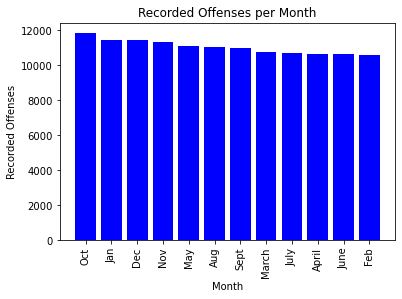

In [12]:
crime = month_datagrouped['Category']
month = ['Oct','Jan','Dec','Nov','May','Aug','Sept','March','July','April','June','Feb']
x = np.arange(len(month))
plt.bar(x, crime, color="b", align="center")
tick_locations = [value for value in x]
plt.xticks(tick_locations, month, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Recorded Offenses')
plt.title('Recorded Offenses per Month')


In [13]:
day_data = sfpd_rawdata_clean[['DayOfWeek','Category']]
day_datagroup = day_data.groupby(['DayOfWeek']).count()
day_datagroup = day_datagroup.sort_values('Category', ascending=False)
day_datagroup

,Category
DayOfWeek,
Friday,20489
Saturday,19450
Thursday,18874
Wednesday,18862
Tuesday,18814
Monday,18379
Sunday,17765


Text(0.5, 1.0, 'Recorded Offenses per Day of the Week')

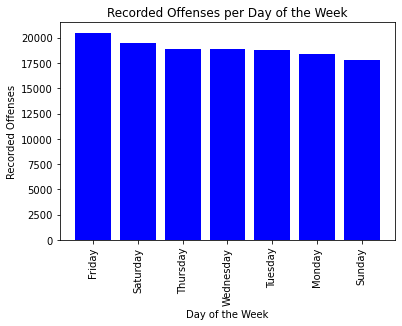

In [14]:
crime = day_datagroup['Category']
day = ['Friday','Saturday','Thursday','Wednesday','Tuesday','Monday','Sunday']
x_axis = np.arange(len(day))
plt.bar(x_axis, crime, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, day, rotation='vertical')
plt.xlabel('Day of the Week')
plt.ylabel('Recorded Offenses')
plt.title('Recorded Offenses per Day of the Week')


In [15]:
incident_df = sfpd_rawdata_clean[['IncidntNum', 'Category']]
groupedincidents = incident_df.groupby(['IncidntNum']).count()
multoffense = groupedincidents.loc[groupedincidents['Category']>1]
multoffense['Category'].count()

21532